# Efficiency of Imaging - measures

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Generic Data Cleaning and EDA

### Import Data and Check the properties

In [3]:
df=pd.read_csv("Outpatient Imaging Efficiency_Hospital.csv",encoding='latin1')

In [4]:
df.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure ID,Measure Name,Score,Footnote,Measure Start Date,Measure End Date
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,OP_10,Abdomen CT Use of Contrast Material,6.4,NaN,07/01/2014,06/30/2015
1,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,OP_11,Thorax CT Use of Contrast Material,0.9,NaN,07/01/2014,06/30/2015
2,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,OP_13,Outpatients who got cardiac imaging stress tes...,7.1,NaN,07/01/2014,06/30/2015
3,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,OP_14,Outpatients with brain CT scans who got a sinu...,2.4,NaN,07/01/2014,06/30/2015
4,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,OP_8,MRI Lumbar Spine for Low Back Pain,38.1,NaN,07/01/2014,06/30/2015


In [5]:
df.shape

(28908, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28908 entries, 0 to 28907
Data columns (total 14 columns):
Provider ID           28908 non-null int64
Hospital Name         28908 non-null object
Address               28908 non-null object
City                  28908 non-null object
State                 28908 non-null object
ZIP Code              28908 non-null int64
County Name           28818 non-null object
Phone Number          28908 non-null int64
Measure ID            28908 non-null object
Measure Name          28908 non-null object
Score                 28908 non-null object
Footnote              12595 non-null object
Measure Start Date    28908 non-null object
Measure End Date      28908 non-null object
dtypes: int64(3), object(11)
memory usage: 3.1+ MB


In [7]:
# Check the data for percentage of null values

round((df.isnull().sum()/df.isnull().count())*100,2)

Provider ID            0.00
Hospital Name          0.00
Address                0.00
City                   0.00
State                  0.00
ZIP Code               0.00
County Name            0.31
Phone Number           0.00
Measure ID             0.00
Measure Name           0.00
Score                  0.00
Footnote              56.43
Measure Start Date     0.00
Measure End Date       0.00
dtype: float64

#### Dropping columns having more than 50% null values and eliminating rows having null values

In [8]:
df= df.dropna(axis=1, thresh=int(0.5*len(df)))
df.shape

(28908, 13)

In [9]:
df=df.dropna(axis=0, how='any')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28818 entries, 0 to 28907
Data columns (total 13 columns):
Provider ID           28818 non-null int64
Hospital Name         28818 non-null object
Address               28818 non-null object
City                  28818 non-null object
State                 28818 non-null object
ZIP Code              28818 non-null int64
County Name           28818 non-null object
Phone Number          28818 non-null int64
Measure ID            28818 non-null object
Measure Name          28818 non-null object
Score                 28818 non-null object
Measure Start Date    28818 non-null object
Measure End Date      28818 non-null object
dtypes: int64(3), object(10)
memory usage: 3.1+ MB


In [11]:
# Drop duplicate records if any
df=df.drop_duplicates(keep='first', inplace=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28818 entries, 0 to 28907
Data columns (total 13 columns):
Provider ID           28818 non-null int64
Hospital Name         28818 non-null object
Address               28818 non-null object
City                  28818 non-null object
State                 28818 non-null object
ZIP Code              28818 non-null int64
County Name           28818 non-null object
Phone Number          28818 non-null int64
Measure ID            28818 non-null object
Measure Name          28818 non-null object
Score                 28818 non-null object
Measure Start Date    28818 non-null object
Measure End Date      28818 non-null object
dtypes: int64(3), object(10)
memory usage: 3.1+ MB


### Removing unwanted data -

### This step will be specific to your dataset 
data where most of the metrics are not available/not applicable wont give any info so removing such records.
Address , city, state can be removed as we have Zip Code 

In [12]:
df=df[~(df["Score"].isin(['Not Applicable','Not Available']))]

In [13]:
df=df.drop(["Address","City","State","Phone Number"],axis=1)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16300 entries, 0 to 28849
Data columns (total 9 columns):
Provider ID           16300 non-null int64
Hospital Name         16300 non-null object
ZIP Code              16300 non-null int64
County Name           16300 non-null object
Measure ID            16300 non-null object
Measure Name          16300 non-null object
Score                 16300 non-null object
Measure Start Date    16300 non-null object
Measure End Date      16300 non-null object
dtypes: int64(2), object(7)
memory usage: 1.2+ MB


### Converting some categorical variables to numeric

In [15]:
df["Score"] = df["Score"].apply(pd.to_numeric,errors='coerce')


In [16]:
df=df.fillna(0)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16300 entries, 0 to 28849
Data columns (total 9 columns):
Provider ID           16300 non-null int64
Hospital Name         16300 non-null object
ZIP Code              16300 non-null int64
County Name           16300 non-null object
Measure ID            16300 non-null object
Measure Name          16300 non-null object
Score                 16300 non-null float64
Measure Start Date    16300 non-null object
Measure End Date      16300 non-null object
dtypes: float64(1), int64(2), object(6)
memory usage: 1.2+ MB


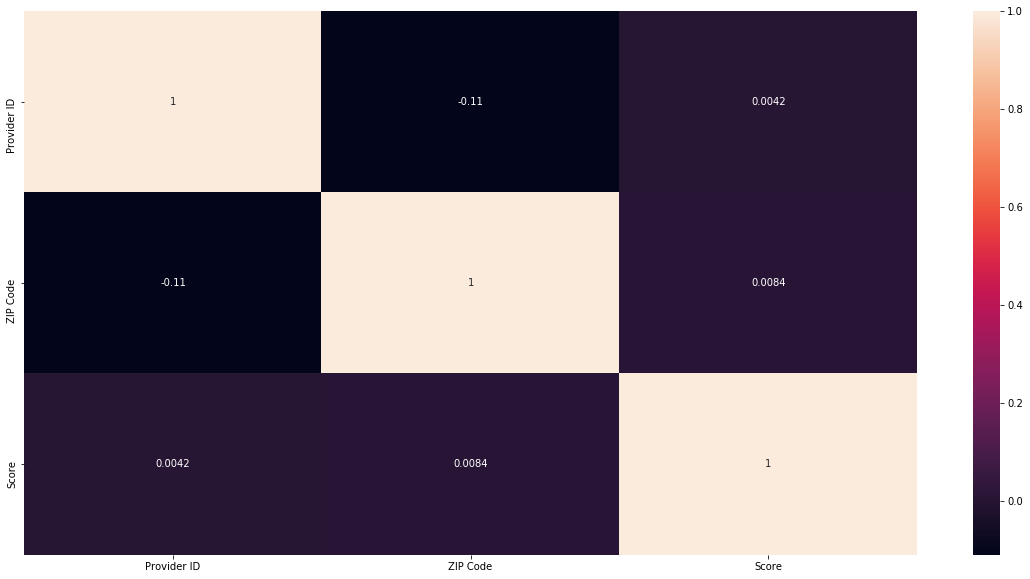

In [18]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(df.corr(),annot = True)
plt.show()

## We can see that there is no significant correlation amoung the columns ; hence heekping all these columns in the dataset for now ; we can later remove certain fields when we merge it to other datasets.

## Writing cleaned data to another file

In [19]:
#Write cleaned data to csv for further use
df.to_csv('Outpatient Imaging Efficiency.csv')

In [20]:
OPImgEff = df[:]
OPImgEff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16300 entries, 0 to 28849
Data columns (total 9 columns):
Provider ID           16300 non-null int64
Hospital Name         16300 non-null object
ZIP Code              16300 non-null int64
County Name           16300 non-null object
Measure ID            16300 non-null object
Measure Name          16300 non-null object
Score                 16300 non-null float64
Measure Start Date    16300 non-null object
Measure End Date      16300 non-null object
dtypes: float64(1), int64(2), object(6)
memory usage: 1.2+ MB


In [21]:
df=pd.read_csv("Outpatient Imaging Efficiency.csv",encoding='latin1')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16300 entries, 0 to 16299
Data columns (total 10 columns):
Unnamed: 0            16300 non-null int64
Provider ID           16300 non-null int64
Hospital Name         16300 non-null object
ZIP Code              16300 non-null int64
County Name           16300 non-null object
Measure ID            16300 non-null object
Measure Name          16300 non-null object
Score                 16300 non-null float64
Measure Start Date    16300 non-null object
Measure End Date      16300 non-null object
dtypes: float64(1), int64(3), object(6)
memory usage: 1.2+ MB


In [23]:
#Drop unwanted columns
df=df.drop(['Hospital Name','ZIP Code','Measure Name','County Name','Measure Start Date','Measure End Date'],axis=1)

In [24]:
df['Measure ID'].unique()

array(['OP_10', 'OP_11', 'OP_13', 'OP_14', 'OP_8', 'OP_9'], dtype=object)

In [25]:
# Pivot table 
df=df.pivot_table(values= 'Score', index= 'Provider ID', columns= 'Measure ID')
df.reset_index(inplace=True)
df = df.rename_axis(None)
df.head()

Measure ID,Provider ID,OP_10,OP_11,OP_13,OP_14,OP_8,OP_9
0,10001,6.4,0.9,7.1,2.4,38.1,6.9
1,10005,13.3,10.2,5.3,4.0,42.8,5.1
2,10006,11.8,4.6,0.0,4.6,45.6,9.1
3,10007,24.3,6.1,NaN,NaN,NaN,20.7
4,10008,3.6,NaN,NaN,0.6,NaN,8.2


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3779 entries, 0 to 3778
Data columns (total 7 columns):
Provider ID    3779 non-null int64
OP_10          3625 non-null float64
OP_11          3346 non-null float64
OP_13          2232 non-null float64
OP_14          2303 non-null float64
OP_8           1523 non-null float64
OP_9           3271 non-null float64
dtypes: float64(6), int64(1)
memory usage: 206.7 KB


In [27]:
round((df.isnull().sum()/df.isnull().count())*100,2)

Measure ID
Provider ID     0.00
OP_10           4.08
OP_11          11.46
OP_13          40.94
OP_14          39.06
OP_8           59.70
OP_9           13.44
dtype: float64

In [28]:
df.fillna(0, inplace=True)

In [29]:
# Drop extra features
df=df.drop('OP_9',axis=1)

In [30]:
# Write data to file in case needed for clustering
df.to_csv('Efficiency_clustering.csv')

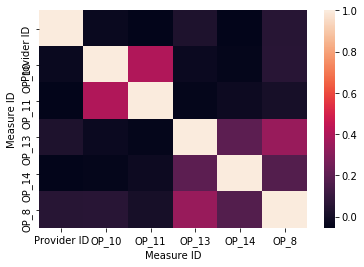

In [31]:
sns.heatmap(df.corr())

In [32]:
# multiplying measure scores with respective weigts(loading coefficients)
df['OP_8'] = df['OP_8']*0.08
df['OP_10'] = df['OP_10']*0.69
df['OP_11'] = df['OP_11']*0.16
df['OP_13'] = df['OP_13']*-0.01
df['OP_14'] = df['OP_14']*-0.02


In [33]:
# Average of the weighted scores to calculated group score.
df['Efficiency_score'] = ((df['OP_8']+df['OP_10']+df['OP_11']+df['OP_13']+df['OP_14'])/5)

In [34]:
#Write data to file which will be used further for supervised learning models
df.to_csv('Efficiency_score.csv')

In [35]:
df_copy=df.drop('Efficiency_score',axis=1)
df_copy.corr()

Measure ID,Provider ID,OP_10,OP_11,OP_13,OP_14,OP_8
Measure ID,,,,,,
Provider ID,1.000000,-0.029231,-0.052799,-0.029370,0.055226,0.053549
OP_10,-0.029231,1.000000,0.406111,0.023586,0.046328,0.059863
OP_11,-0.052799,0.406111,1.000000,0.045712,0.019887,0.008933
OP_13,-0.029370,0.023586,0.045712,1.000000,0.196668,-0.345804
OP_14,0.055226,0.046328,0.019887,0.196668,1.000000,-0.173416
OP_8,0.053549,0.059863,0.008933,-0.345804,-0.173416,1.000000


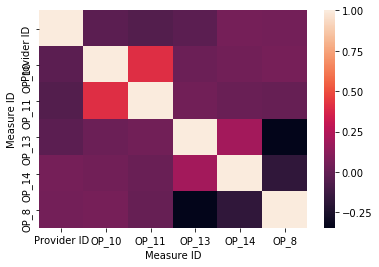

In [36]:
sns.heatmap(df_copy.corr())

In [37]:
df1= df_copy.drop('Provider ID',axis=1)

In [38]:
meandf= pd.DataFrame(df1.mean())

In [39]:
meandf['index1'] = meandf.index

In [40]:
meandf = meandf.rename_axis(None)
meandf.rename(columns={'index1':'Measures',0:'mean'},inplace=True)
meandf

,mean,Measures
OP_10,5.938053,OP_10
OP_11,0.449334,OP_11
OP_13,-0.027676,OP_13
OP_14,-0.033992,OP_14
OP_8,1.295519,OP_8


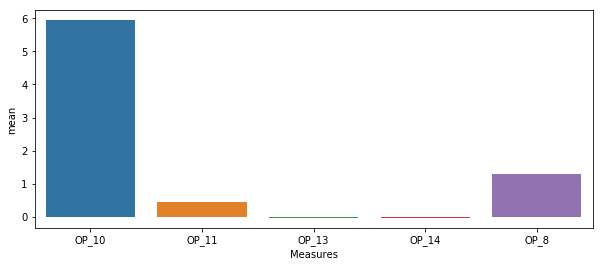

In [41]:
plt.figure(figsize=(10, 4))
ax = sns.barplot(y='mean', x='Measures', data= meandf)